# Project: Data analysis of potential attributes may affect the attendance rate of medical appoinements in Brasil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, the project would focus on the data from 100k medical appointments in Brazi and analyze what attributions would affect the patients who show up for their appointments. The project explores the relationship between the valuables of  ScheduledDay, AppointmentDay, age, Neighbourhood, Scholarship, and SMS_received, and the No-show-up appointment data. And at the end of the project, there will be an analysis of which valuables have the most significant effects on the attendance rate of the appointments. 
> There will be five questions to discuss in this project:
1. Does attendance rate of appointments affected by SMS received?
2. Does attendance rate of appointments are affected by Scholarship?
3. Do the differences between scheduled day and apoointment day from patients affect the attendance rate of appointments?
4. Do patients from different the neighbourhoods would affect the attendance rate of appointments?
5. Do the age of patients affect the attendance rate of appointments?


Importing dataset from kaggle, link: https://www.kaggle.com/joniarroba/noshowappointments



In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline
from matplotlib.pyplot import figure


df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, the data will be loaded, checked for cleanliness, and  the dataset will be then trimed and cleaned for analysis. 
### General Properties
check how many data in the dataset

In [193]:
df.shape

(110527, 14)

check any missing data of the dataset

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is not null data in each column, each non-null count match with the number of rows the dataset.

Next, check any redundancy data in the dataset.

In [195]:
sum(df.duplicated())

0

There is not duplicated data

Then, check some of the data types and see if they are correct  

In [196]:
type(df['ScheduledDay'][0])

str

In [197]:
type(df['AppointmentDay'][0])

str

In [198]:
type(df['No-show'][0])

str



### Data Cleaning 


From the data type checking we could see the data type of ScheduledDay and AppointmentDay are not datetime but string, therefore the data type of these two columns should be changed.

In [199]:

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Also the column of No-show appointment contains string No and Yes, which should be changed to integer(or float) such as 0 and 1 that easier for later analyze process.

In [200]:
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

Check the data type of ScheduledDay and AppointmentDay again.

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Let see the distribution of no-show-appointment.  

<AxesSubplot:xlabel='No-show'>

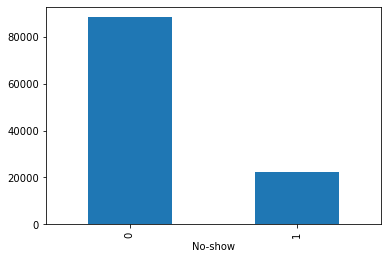

In [202]:
df.groupby('No-show')['PatientId'].count().plot(kind = 'bar')

From the graph we could see most of the patients show up for the appointment.

<a id='eda'></a>
## Exploratory Data Analysis

>In this section of the report, let's look at what attributes affect the amount of not-show appointments that occur and investigate the relationships between the data.

### Question 1: Does attendance rate of appointments affected by SMS received?

This section try to demonstrate whether patients received or not recerived SMS affect the number of no-show appointments.

In [203]:
dfsms = df[['SMS_received', 'No-show']]
records = dfsms.values.tolist()
result = list(records)
result
nn = result.count([0, 0])
ny = result.count([0, 1])
yn = result.count([1, 0])
yy = result.count([1, 1])
print(nn,ny,yn,yy)

62510 12535 25698 9784


* nn represents patients did not receive SMS but show up to the appointments.
* ny represents patients did not receive SMS and did not show up to the appointments.
* yn represents patients received SMS and show up to the appointments.
* yy represents patients received SMS but did not show up to the appointments.


By counting the frequency of the these combiniations, we could plot a char that compare their differences in number and visualized graph.


<AxesSubplot:>

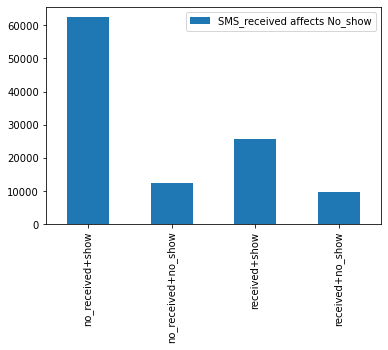

In [204]:
df1 = pd.DataFrame({'SMS_received affects No_show': [nn, ny, yn, yy]},
                  index=['no_received+show', 'no_received+no_show', 'received+show',  'received+no_show'])
df1.plot(kind='bar')

From the graph, we can see that most patients do not even receive the SMS, but they still show up for the appointments. And patients that received SMS or did not receive SMS have a similar amount of not showing up to the appointments, but still patients who received SMS but did not show up the appointments less than the patients who did not receive SMS. So SMS may play a less critical role in affecting patients' decisions to attend the appointments. 


### Question 2: Does attendance rate of appointments are affected by Scholarship?

Scholarship is refering to whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. The following section would show the relationship between enrollments of scholarship and the amount of no show appoinments.

In [205]:
dfscho = df[['Scholarship', 'No-show']]
records2 = dfscho.values.tolist()
result2 = list(records2)
result2
nn2 = result2.count([0, 0])
ny2 = result2.count([0, 1])
yn2 = result2.count([1, 0])
yy2 = result2.count([1, 1])
print(nn2,ny2,yn2,yy2)

79925 19741 8283 2578


* nn2 represents patients did not enroll scholorship but show up to the appointments.
* ny2 represents patients did not enroll scholorship and did not show up to the appointments.
* yn2 represents patients enroll scholorship and show up to the appointments.
* yy2 represents patients enroll scholorship but did not show up to the appointments.


By counting the frequency of the these combiniations, we could plot a char that compare their differences in number and visualized graph.



<AxesSubplot:>

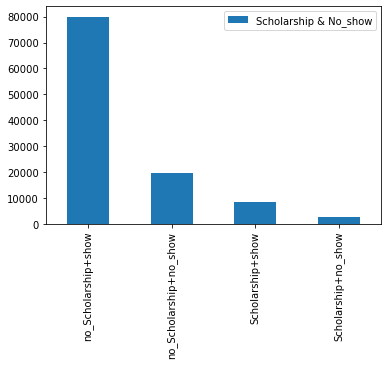

In [206]:
df2 = pd.DataFrame({'Scholarship & No_show': [nn2, ny2, yn2, yy2]},
                  index=['no_Scholarship+show', 'no_Scholarship+no_show', 'Scholarship+show',  'Scholarship+no_show'])
df2.plot(kind='bar')

Based on the graph, we could see that the Brasilian welfare program is not firmly affecting the attendance rate of the appointments. Many patients show up to the appointments under the situation that the Brasilian welfare program did not cover them. Even some patients enrolled in the program, and it still has less chance that the patients were not showing up at the appointment date.

### Question 3: Do the differences between scheduled day and apoointment day from patients affect the attendance rate of appointments?

In this section, the differences between the scheduled day and appointment day from patients will be calculated and based on the days of differences to count the frequency of each period. Since the frequency of each time period will be different, the section will compare the ratio of the frequency of each time period, instead of the sum of the frequency.

In [207]:
#calculate the time period between his/her scheduled day and apoointment day of each patient 
df_difference = df['AppointmentDay'] - df['ScheduledDay']
df_diff = df_difference.tolist()
n_s = df['No-show'].tolist()
list_of_tuples = list(zip(df_diff, n_s))
df6 = pd.DataFrame(list_of_tuples,
                  columns = ['Days_Difference', 'no_show'])

#change the data type of the day to integer
df6['Days_Difference'] = df6['Days_Difference'].dt.days.astype('int16')

Since the "No-show" data is represented by 0 and 1, 0 means patients show up the appointments, and 1 illustrates that patients do not show up the appointments. Therefore the sum of the "No-show" column will be the total amount that patients did not show up for the appointments (1+1+1....). And the count of the "No-show" column will be the total amount of appointment records. So we can compare the ratio between the total no-show-up appointments and the total amount of the appointment records to analyze which day periods between scheduled day and appointment day will have a higher percentage of the no-show-up appointments. 
The count_ratio function takes a dataframea and two arguments that we need to find out the relationship with and return the result, and plot_ratio functiom is ploting the result of the count_ratio



In [208]:
def count_ratio(df, arg1, arg2):
    sum_count = df.groupby(arg1)[arg2].sum()
    total_count = df.groupby(arg1)[arg2].count()
    sum_count_df = sum_count.to_frame()
    total_count_df = total_count.to_frame()
    ratio = sum_count_df[arg2] / total_count_df[arg2] 
    ratio1 = ratio.to_frame()
    return ratio1

def plot_ratio(df,arg1, arg2):
    ratio1 = count_ratio(df,arg1, arg2)
    ax = ratio1.plot(kind='bar', title='No-show appointment related with ' + arg1 ,fontsize=8,figsize=(20, 10));
    ax.set_xlabel(arg1)
    ax.set_ylabel(arg2)
    return ax

In [209]:
count_ratio(df6,'Days_Difference',  'no_show').sort_values(by = 'no_show' , ascending=False).head(10)

,no_show
Days_Difference,
-7,1.00
131,1.00
150,1.00
145,1.00
125,1.00
-2,1.00
138,1.00
103,0.75
154,0.60


<AxesSubplot:title={'center':'No-show appointment related with Days_Difference'}, xlabel='Days_Difference', ylabel='no_show'>

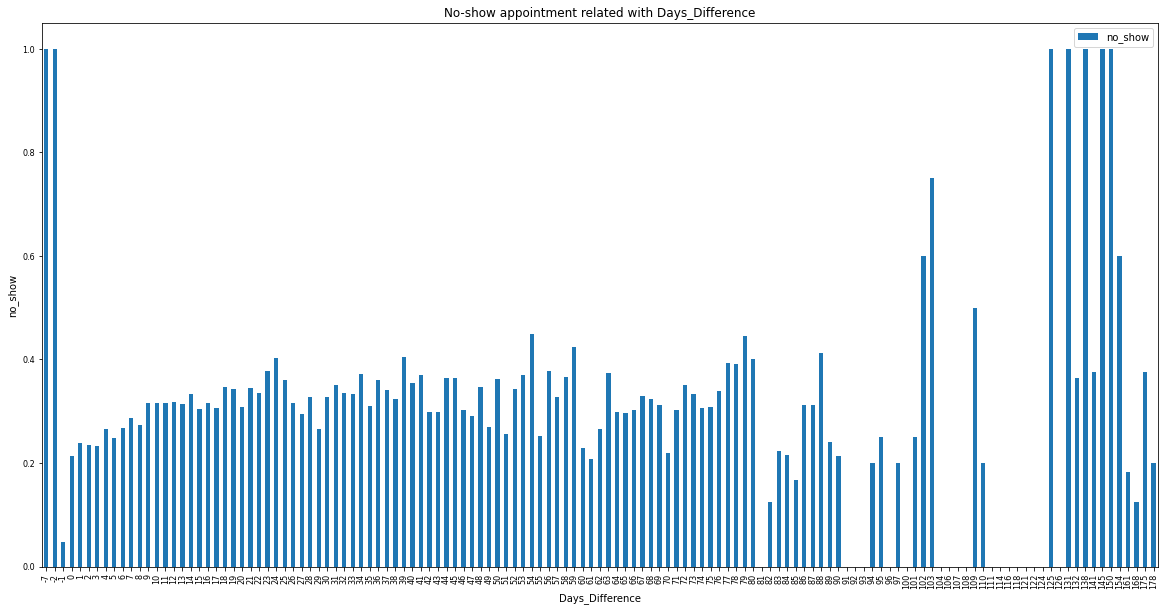

In [210]:
plot_ratio(df6,'Days_Difference',  'no_show')

The table presents the top 10 day differences period that patients may forget the appointments or not show up to the appointments. There are some cases in the days differences are the negative number. Maybe there is an occasion that the patients reschedule the appointments. But let's move on from these types of data. The rest of the day differences have a higher percentage of no attendance of appointment, which the day periods between scheduled day and appointment day are in the range of 102 to 154 days (except the days that do not have non-show appointments, since the data amounts are not enuogh). 

From the graph, we could see that besides the negative number of day periods, the more extended day periods between the schedule and appointments, the higher chance of patients not showing up to the appointments.

### Question 4: Do patients from different the neighbourhoods would affect the attendance rate of appointments?

Using the similar method from question3, this section will analyze patients from which neighbourhoods will higher not attendance rate of the appointments.

In [211]:
count_ratio(df,'Neighbourhood',  'No-show').sort_values(by = 'No-show' , ascending=False).head(10)

,No-show
Neighbourhood,
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.289185
SANTA CECÍLIA,0.274554
SANTA CLARA,0.264822
ITARARÉ,0.262664
JESUS DE NAZARETH,0.243954
HORTO,0.240000
ILHA DO PRÍNCIPE,0.234775
CARATOÍRA,0.230409


In [212]:
df.loc[df['Neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
48754,5.349869e+11,5583947,F,2016-04-14 12:25:43+00:00,2016-05-13 00:00:00+00:00,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1
48765,7.256430e+12,5583948,F,2016-04-14 12:26:13+00:00,2016-05-13 00:00:00+00:00,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1


By grouping the Neighbourhood category, we could see the top ten neighbourhood of patients who have higher percentage of showing up the appointments. 

Since the ILHAS OCEÂNICAS DE TRINDADE neighborhood has 100% of not attended the appointment, it is better to check the details of the patients from this neighborhood. And we could see there were only two patients from this neighborhood and they were both not showing up to the appointment. Therefore more data from the ILHAS OCEÂNICAS DE TRINDADE neighborhood will be better for analyzing whether patients from this neighborhood have less willingness to show up to the appointments.

<AxesSubplot:title={'center':'No-show appointment related with Neighbourhood'}, xlabel='Neighbourhood', ylabel='No-show'>

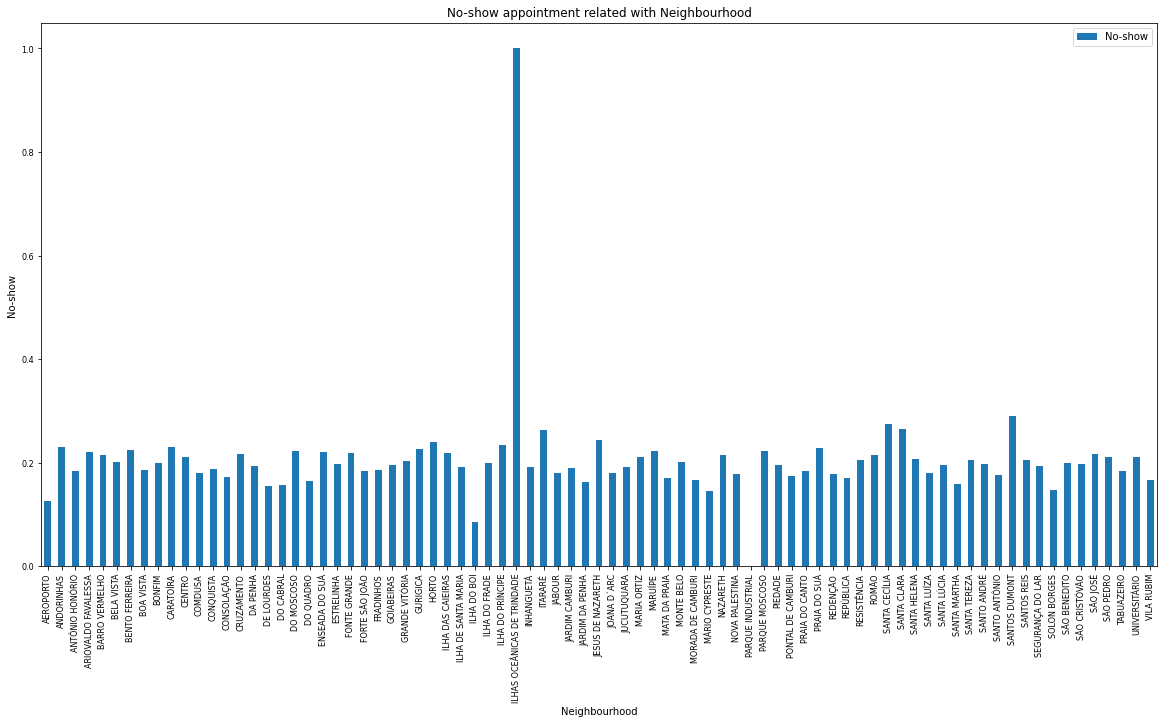

In [213]:
plot_ratio(df,'Neighbourhood',  'No-show')




### Question 5: Do the age of patients affect the attendance rate of appointments?

Using the similar method from question3, this section will analyze if the age of patients will be a factor that affect the attendance rate of the appointments.

In [215]:
count_ratio(df, 'Age', 'No-show' ).sort_values(by = 'No-show' , ascending=False).head(10)

,No-show
Age,
115,0.600000
14,0.282648
13,0.274705
15,0.265896
9,0.265306
25,0.264264
17,0.262425
24,0.258454
22,0.255087


From the graph, we could see that besides the ILHAS OCEÂNICAS DE TRINDADE neighborhood, patients from other neighborhoods have a simiar willingness to attend the appointments. The percentage of not showing up the appointments from most neighborhoods is around 15% to 30 %. Neighborhoods like SANTOS DUMONT, SANTA CECÍLIA, and SANTA CLARA have a higher percentage of not showing up for the appointments.

<AxesSubplot:title={'center':'No-show appointment related with Age'}, xlabel='Age', ylabel='No-show'>

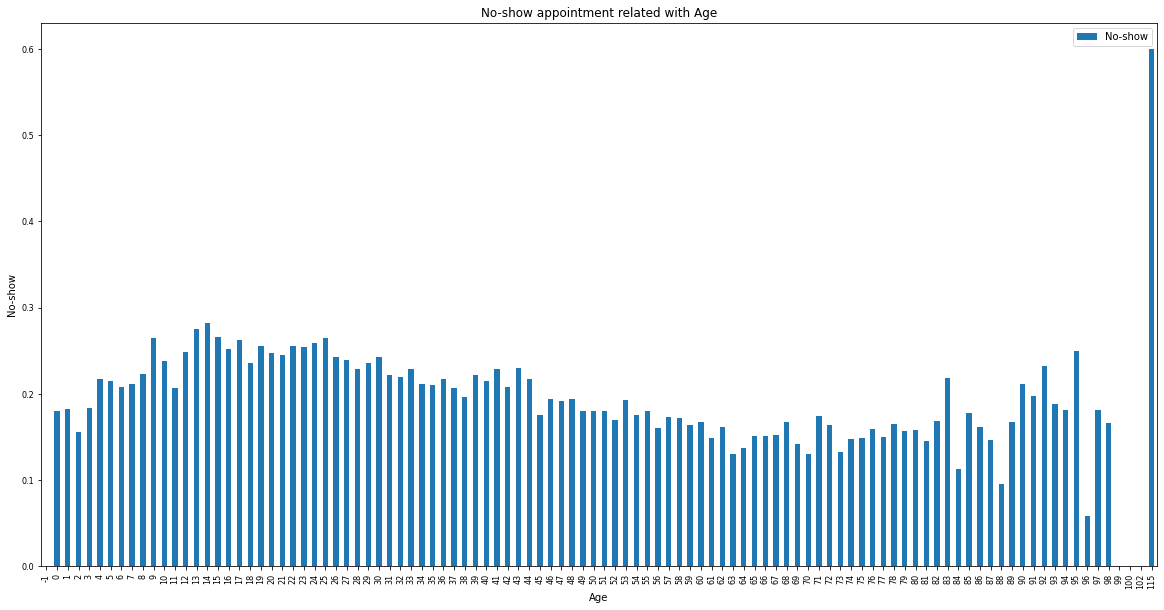

In [216]:
plot_ratio(df,'Age',  'No-show')

From the table, the top ten patient groups with a higher chance of not showing up to the appointments are the patients between 9 to 25, and the show-up rate is around 25% - 28%. Patients in the age 115 have the highest percentage of not show up rate, which is 60%.

From the Graph, we could see that teenagers or younger patients have a higher chance of not showing up for the appointment than middle-aged patients. The attendance data of patients aged 99-102 is missing since there is a 0 % no-show-up rate. But general saying, the percentage of each group age of patients show up the rate of appointments are higher, which mean most of the patients would attend to their appointments.

<a id='conclusions'></a>
## Conclusions


> By analyzing five variables SMS_recerived, Scholarship, days differences between the scheduled day and appointment day, neighborhoods, and age, we could conclude that the period differences between the scheduled day and appointment day and age of patients are two factors most likely to affect the attendance of appointments. The longer gap between the scheduled day and appointment day, the larger chance of patients not showing up to the appointments. And younger patients aged between 9 to 25 have a higher percentage of missing appointments than the patients in middle age.

> Although many patients still show up the medical appointments even they do not receive SMS, the patients who received SMS have a higher chance to show up for the appointments than those who did not receive it. Moreover, most patients did not enroll in the scholarship program, but most showed up to the appointments. And for a neighborhood like SANTOS DUMONT, SANTA CECÍLIA, and SANTA CLARA have a higher percentage of not showing up the appointments. Still, other neighborhoods have a similar not show-up rate of appointments.

> However, the data cleaning process still needs to be improved. Some amounts of data are not enough for analysis. For example, only have two patients from neighborhoods ILHAS OCEÂNICAS DE TRINDADE. And there are some cases that the days differences between the scheduled day and appointment day are negative, which needs to find out why some appointment days are ahead of the scheduled days in the original data. And if there is a dataset about the distances between the neighborhoods of patients and hospitals, we could analyze whether the distances would affect the attendance rate of appointments. 

